In [3]:
'''=============================================================================
Ex3: Hypothesis testing
    Câu 2: P-test và T-test
        Cho 2 bộ dữ liệu life_battery Chapter 5. Hai bộ dữ liệu này độc lập nhau.
        Đọc dữ liệu và gán cho 2 biến là life1_array và life2_array.
        Áp dụng t-test để kiểm định H0: 'The mean are equal', với alpha = 0.05
============================================================================='''
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

In [5]:
#To compare two normally distributed samples knowing their standard deviation population (sigma) => Use Z-test

#If the two samples are normally distributed, but do not know the sd of population => Use T-test

#If they are not normally distributed, and don't know the sigma either => use Wilcoxon rank sum test

In [7]:
#Cho 2 bộ dữ liệu life_battery Chapter 5. Hai bộ dữ liệu này độc lập nhau.
#Đọc dữ liệu và gán cho 2 biến là life1_array và life2_array.

f1 = open('data/life_batteries.txt')
batt1 = np.array(f1.read().replace('\n','\t').strip('\t').split('\t'))
f1.close()
batt1 = batt1.astype(int)
print('\nBatteries_1 life:\n',batt1)


f2 = open('data/life_batteries_2.txt')
batt2 = np.array(f2.read().replace('\n','\t').strip('\t').split('\t'))
f2.close()
batt2 = batt2.astype(int)
print('\nBatteries_2 life:\n',batt2)


Batteries_1 life:
 [130 145 126 146 164 130 132 152 145 129 133 155 140 127 139 137 131 126
 145 148 125 132 126 126 126 135 131 129 147 136 129 136 156 146 130 146
 132 142 132 132]

Batteries_2 life:
 [134 130 140 151 143 134 136 144 150 135 160 141 143 140 138 141 148 146
 140 146 151 138 151 139 151 128 146 147 152 142 144 134 142 146 142 136
 122 134 145 147]


    batteries_life batteries_name
0              130      battery_1
1              145      battery_1
2              126      battery_1
3              146      battery_1
4              164      battery_1
..             ...            ...
75             136      battery_2
76             122      battery_2
77             134      battery_2
78             145      battery_2
79             147      battery_2

[80 rows x 2 columns]


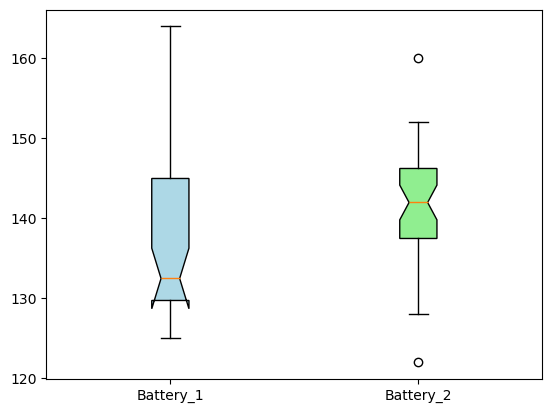


Shapiro-wilk test of batteries_1: ShapiroResult(statistic=0.9043743178387402, pvalue=0.0025690561719209845)

Shapiro-wilk test of batteries_2: ShapiroResult(statistic=0.9833054030492363, pvalue=0.8091436840754751)

The batteries_1 group is not normally distributed => Cannot use T-test

Use Mann-whitney U test instead of T-test for batt1 and batt2: MannwhitneyuResult(statistic=507.0, pvalue=0.004838315951387339)
       p-value = 0.0048 < alpha = 0.05 => batt1 and batt2 are different samples

Try out t-test for batt1 and batt2: TtestResult(statistic=-2.6113890791026946, pvalue=0.010811240390727006, df=78.0)
       The result of t-test is the same as mann-whitney, but not for all the cases


In [13]:
#Áp dụng t-test để kiểm định H0: 'The mean are equal', với alpha = 0.05

#Create dataframe batt as a tall dataframe for easier to draw boxplot
batt = pd.DataFrame({
    'batteries_life':np.concatenate((batt1,batt2)),
    'batteries_name':['battery_1']*batt1.size + ['battery_2']*batt2.size
})
print(batt)

#Draw notch boxplot to see the difference
box = plt.boxplot([batt1,batt2], tick_labels=['Battery_1','Battery_2'], notch=True, patch_artist=True)

# Set box colors
colors = ['lightblue', 'lightgreen']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

#Check shapiro-wilk test for normality
print('\nShapiro-wilk test of batteries_1:',stats.shapiro(batt1))
print('\nShapiro-wilk test of batteries_2:',stats.shapiro(batt2))
print('\nThe batteries_1 group is not normally distributed => Cannot use T-test')

#Use Mann-whitney U test instead of T-test
print('\nUse Mann-whitney U test instead of T-test for batt1 and batt2:', stats.mannwhitneyu(batt1, batt2, alternative='two-sided'))
print('       p-value = 0.0048 < alpha = 0.05 => batt1 and batt2 are different samples')

print('\nTry out t-test for batt1 and batt2:', stats.ttest_ind(batt1, batt2, alternative='two-sided'))
print('       The result of t-test is the same as mann-whitney, but not for all the cases')

In [15]:
print('------------------------------------------')
print('Các giả thuyết kiểm định                  ')
print('    H0: Mean_1 = Mean_2                   ')
print('    Ha: Mean_1 <> Mean_2                  ')
print('------------------------------------------')
alpha            = .05
confidence_level = 1 - alpha

t, p = stats.ttest_ind(batt1, batt2)

##------------------------------------------------------------------------------
print('\n**** Phương pháp CRITICAL VALUE (giá trị tới hạn)')
##------------------------------------------------------------------------------    
df       = batt.shape[0] - 1
critical = stats.t.ppf(confidence_level, df)
print('    - critical value = %.4f, statistic = %.4f' % (critical, t))

if (abs(t) >= critical):
    print('    Bác bỏ H0 ==> Mean_1 <> Mean_2')
else:
    print('    KHÔNG bác bỏ H0 ==> Mean_1 = Mean_2')


##------------------------------------------------------------------------------
print('\n**** Phương pháp TRỊ SỐ p (p-value) ----')
##------------------------------------------------------------------------------    
print('    - alpha = %.2f, p = %.5f' % (alpha, p))

if (p <= alpha):
    print('    Bác bỏ H0 ==> Mean_1 <> Mean_2')
else:
    print('    KHÔNG bác bỏ H0 ==> Mean_1 = Mean_2')

------------------------------------------
Các giả thuyết kiểm định                  
    H0: Mean_1 = Mean_2                   
    Ha: Mean_1 <> Mean_2                  
------------------------------------------

**** Phương pháp CRITICAL VALUE (giá trị tới hạn)
    - critical value = 1.6644, statistic = -2.6114
    Bác bỏ H0 ==> Mean_1 <> Mean_2

**** Phương pháp TRỊ SỐ p (p-value) ----
    - alpha = 0.05, p = 0.01081
    Bác bỏ H0 ==> Mean_1 <> Mean_2
